this dataset is gotten from link: https://www.kaggle.com/datasets/eyimofeapinnick/nigeria-rent-prices-2022

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import re
%matplotlib inline

C:\Users\user\AppData\Local\Temp\ipykernel_7304\1923398239.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [29]:
df=pd.read_csv('nigeria-rent.csv')
df.head(3)

,Title,More Info,Location,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets
0,Newly Built 4 Bedroom Semi Detached House With Bq,4 BEDROOM HOUSE FOR RENT,"White Oak Estate, Ologolo Opp. Agungi, Ologolo...","5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets
1,Superb 4 Bedroom Semi Detached Duplex With Bq,4 BEDROOM HOUSE FOR RENT,"Hrc Estate Beside Vgc Estate, Vgc Lekki Lagos","5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets
2,Furnished 2 Bedroom Terrace Duplex For Rent !!!,2 BEDROOM HOUSE FOR RENT,Osapa London Lekki Lagos,"3,500,000",1,0,0,2 beds,3 baths,3 Toilets


In [41]:
df.Bedrooms =pd.to_numeric(df['Bedrooms'].str[:1], errors='coerce')
df.Bathrooms =pd.to_numeric(df['Bathrooms'].str[:1], errors='coerce')
df.Toilets =pd.to_numeric(df['Toilets'].str[:1], errors='coerce')

df.head(3)

,Title,More Info,Location,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,Unit,Amount
0,Newly Built 4 Bedroom Semi Detached House With Bq,BEDROOM HOUSE FOR RENT,"White Oak Estate, Ologolo Opp. Agungi, Ologolo...",5000000.0,0,1,0,4.0,4.0,5.0,yea,5000000.0
1,Superb 4 Bedroom Semi Detached Duplex With Bq,BEDROOM HOUSE FOR RENT,"Hrc Estate Beside Vgc Estate, Vgc Lekki Lagos",5000000.0,0,1,0,4.0,4.0,5.0,yea,5000000.0
2,Furnished 2 Bedroom Terrace Duplex For Rent !!!,BEDROOM HOUSE FOR RENT,Osapa London Lekki Lagos,350000.0,1,0,0,2.0,3.0,3.0,None,350000.0


In [40]:
def remove_number_prefix(text):
    return re.sub(r'^\d+\s', '', text)

# Apply the function to the 'More Info' column
df['More Info'] = df['More Info'].apply(remove_number_prefix)


                                                   Title  \
0      Newly Built 4 Bedroom Semi Detached House With Bq   
1          Superb 4 Bedroom Semi Detached Duplex With Bq   
2        Furnished 2 Bedroom Terrace Duplex For Rent !!!   
3                           2 Bedroom Apartment For Rent   
4      ?? Brand New 2 Bedroom Flat For Rent!!! (groun...   
...                                                  ...   
98075            4 Bedroom Duplex In Serene Neighborhood   
98076         Lovely Built 3 Bedroom Flats Self Compound   
98077                           Executive 2 Bedroom Flat   
98078  Executive Brand New 2 Bedroom Flat All Rooms E...   
98079                          3 Bedroom Flat All Ensuit   

                              More Info  \
0                BEDROOM HOUSE FOR RENT   
1                BEDROOM HOUSE FOR RENT   
2                BEDROOM HOUSE FOR RENT   
3                BEDROOM HOUSE FOR RENT   
4                BEDROOM HOUSE FOR RENT   
...                  

In [31]:
df[['Price','Unit']]=df['Price'].str[0:-1].str.split('/',expand=True)
df.head(3)

,Title,More Info,Location,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,Unit
0,Newly Built 4 Bedroom Semi Detached House With Bq,4 BEDROOM HOUSE FOR RENT,"White Oak Estate, Ologolo Opp. Agungi, Ologolo...","5,000,000",0,1,0,4 beds,4 baths,5 Toilets,yea
1,Superb 4 Bedroom Semi Detached Duplex With Bq,4 BEDROOM HOUSE FOR RENT,"Hrc Estate Beside Vgc Estate, Vgc Lekki Lagos","5,000,000",0,1,0,4 beds,4 baths,5 Toilets,yea
2,Furnished 2 Bedroom Terrace Duplex For Rent !!!,2 BEDROOM HOUSE FOR RENT,Osapa London Lekki Lagos,"3,500,00",1,0,0,2 beds,3 baths,3 Toilets,None


In [38]:
df['Price'].dtype

dtype('float64')

In [15]:
df['Unit'].unique()

array(['yea', None, 'sq', 'da', 'mont'], dtype=object)

In [33]:
df['Price'] = df['Price'].str.replace(',', '').replace('', '0').astype(float)

# Calculate the 'Amount' column based on the 'Unit' column
df['Amount'] = df.apply(
    lambda row: row['Price'] * 365.24 if row['Unit'] == 'da' 
    else (row['Price'] * 12 if row['Unit'] == 'mont' 
    else row['Price']), axis=1)

In [43]:
df['More Info'].unique()

array(['BEDROOM HOUSE FOR RENT', 'BEDROOM FLAT / APARTMENT FOR RENT',
       'FLAT / APARTMENT FOR RENT', 'COMMERCIAL PROPERTY FOR RENT',
       'HOUSE FOR RENT', 'BEDROOM COMMERCIAL PROPERTY FOR RENT',
       'CO WORKING SPACE FOR RENT', 'LAND FOR RENT',
       'BEDROOM LAND FOR RENT', 'BEDROOM CO WORKING SPACE FOR RENT',
       'SELF CONTAIN FLAT / APARTMENT FOR RENT',
       'BEDROOM DETACHED DUPLEX HOUSE FOR RENT',
       'BEDROOM MINI FLAT MINI FLAT FLAT / APARTMENT FOR RENT',
       'BEDROOM TERRACED DUPLEX HOUSE FOR RENT',
       'BEDROOM MINI FLAT FOR RENT', 'BEDROOM STUDIO APARTMENT FOR RENT',
       'BEDROOM TERRACED DUPLEX FOR RENT',
       'BEDROOM SELF CONTAIN FOR RENT',
       'BEDROOM DETACHED DUPLEX FOR RENT', 'SELF CONTAIN FOR RENT',
       'PRIVATE OFFICE FOR RENT', 'SHOP FOR RENT',
       'OFFICE SPACE FOR RENT', 'MEETING ROOM FOR RENT',
       'DETACHED DUPLEX FOR RENT', 'TERRACED DUPLEX FOR RENT',
       'SEMI DETACHED DUPLEX FOR RENT', 'SHOW ROOM FOR RENT',
      

In [47]:
df['More Info'] = df['More Info'].str.replace('BEDROOM ', '')

print(df['More Info'])

0                  HOUSE FOR RENT
1                  HOUSE FOR RENT
2                  HOUSE FOR RENT
3                  HOUSE FOR RENT
4                  HOUSE FOR RENT
                   ...           
98075              HOUSE FOR RENT
98076       SELF CONTAIN FOR RENT
98077    BLOCKS OF FLATS FOR RENT
98078    BLOCKS OF FLATS FOR RENT
98079    BLOCKS OF FLATS FOR RENT
Name: More Info, Length: 98080, dtype: object


In [161]:
len(df['More Info'].unique())

15

In [49]:
df['More Info'].unique()

array(['HOUSE FOR RENT', 'FLAT / APARTMENT FOR RENT',
       'COMMERCIAL PROPERTY FOR RENT', 'CO WORKING SPACE FOR RENT',
       'LAND FOR RENT', 'SELF CONTAIN FLAT / APARTMENT FOR RENT',
       'DETACHED DUPLEX HOUSE FOR RENT',
       'MINI FLAT MINI FLAT FLAT / APARTMENT FOR RENT',
       'TERRACED DUPLEX HOUSE FOR RENT', 'MINI FLAT FOR RENT',
       'STUDIO APARTMENT FOR RENT', 'TERRACED DUPLEX FOR RENT',
       'SELF CONTAIN FOR RENT', 'DETACHED DUPLEX FOR RENT',
       'PRIVATE OFFICE FOR RENT', 'SHOP FOR RENT',
       'OFFICE SPACE FOR RENT', 'MEETING ROOM FOR RENT',
       'SEMI DETACHED DUPLEX FOR RENT', 'SHOW ROOM FOR RENT',
       'BLOCKS OF FLATS FOR RENT', 'JOINT VENTURE LAND FOR RENT',
       'COMMERCIAL LAND FOR RENT', 'WAREHOUSE FOR RENT',
       'SHARED APARTMENT FOR RENT', 'SHOP IN A MALL FOR RENT',
       'SEMI DETACHED BUNGALOW FOR RENT', 'BOYS QUARTERS FOR RENT',
       'PENTHOUSE FOR RENT', 'MASSIONETTE FOR RENT',
       'DETACHED BUNGALOW FOR RENT', 'HOTEL/GUEST H

In [34]:
df.Amount

0        5000000.0
1        5000000.0
2         350000.0
3         270000.0
4         500000.0
           ...    
98075      90000.0
98076      50000.0
98077      33000.0
98078      40000.0
98079      15000.0
Name: Amount, Length: 98080, dtype: float64

In [54]:
df=df.drop(['Unit','Title','Price'],axis=1)
df.head(3)

In [57]:
df.Location.unique()

array(['White Oak Estate, Ologolo Opp. Agungi, Ologolo Lekki Lagos',
       'Hrc Estate Beside Vgc Estate, Vgc Lekki Lagos',
       'Osapa London Lekki Lagos', ...,
       'Oluwaga Road. Baruwa Ipaja Lagos',
       'By Sterling Bank Magboro Obafemi Owode Ogun',
       '3bedroom Flat At Jeje Area, Apete.all Rooms Ensuit,tiles With Running Water. Rent 150k, Caution 10k, Agreement 10k, Agency & Legal 30k. Tp 210 Eleyele Ibadan Oyo'],
      dtype=object)

In [56]:
len(df.Location.unique())

32556

**Cleaning the ['More Info'] column**

In [ ]:
# Find rows where any column contains the word "flat" (case-insensitive)
flat_rows = df[df.apply(lambda row: row.astype(str).str.lower().str.contains('flat').any(), axis=1)]

print(flat_rows)

In [155]:
df['More Info'].unique()

array(['House', 'Flat', 'Show Room/Shop', 'Work Space', 'Land/Farm',
       'Self Contained', 'Pent/Duplex', 'Studio', 'Warehouse', 'Bungalow',
       'Boys Quarters', 'Mansionette', 'Hotel/Guest and Event Centre',
       'School', 'Church'], dtype=object)

In [146]:
# Find rows where 'More Info' column contains the word "flat" (case-insensitive)
flat_row = df[df['More Info'].str.lower().str.contains('flat')]

flat_row=flat_row['More Info'].unique()
print(flat_row)

['HOUSE FOR RENT' 'Warehouse' 'DETACHED HOUSE FOR RENT'
 'TERRACED BUNGALOW HOUSE FOR RENT' 'DETACHED BUNGALOW HOUSE FOR RENT'
 'SEMI DETACHED BUNGALOW HOUSE FOR RENT' 'PENT HOUSE FOR RENT']


In [142]:
df['More Info']=df['More Info'].replace(['FLAT / APARTMENT FOR RENT',
       'MINI FLAT MINI FLAT FLAT / APARTMENT FOR RENT',
       'MINI FLAT FLAT / APARTMENT FOR RENT',
       'MINI FLAT FOR RENT',
       'MINI FLAT HOUSE FOR RENT',
       'SHARED APARTMENT FLAT / APARTMENT FOR RENT',
       'MINI FLAT FLAT / APARTMENT FOR RENT',
       'SHARED APARTMENT FOR RENT',
       'MINI FLAT HOUSE FOR RENT',
       'MINI FLAT DETACHED BUNGALOW HOUSE FOR RENT'
       'MINI FLAT SEMI DETACHED BUNGALOW HOUSE FOR RENT',
       'MINI FLAT DETACHED BUNGALOW HOUSE FOR RENT',      
       'MINI FLAT TERRACED BUNGALOW HOUSE FOR RENT',
       'SHARED APARTMENT FLAT / APARTMENT FOR RENT',
       'MINI FLAT SHARED APARTMENT FLAT / APARTMENT FOR RENT',
       'MINI FLAT COMMERCIAL PROPERTY FOR RENT'],'Flat')

In [123]:
df['More Info']=df['More Info'].replace(['STUDIO APARTMENT FOR RENT',
       'MINI FLAT STUDIO APARTMENT FLAT / APARTMENT FOR RENT',
       'STUDIO APARTMENT FLAT / APARTMENT FOR RENT',
       'MINI FLAT STUDIO APARTMENT FOR RENT'],'Studio')

In [154]:
df['More Info']=df['More Info'].replace(['DETACHED DUPLEX HOUSE FOR RENT', 'TERRACED DUPLEX HOUSE FOR RENT',
       'TERRACED DUPLEX FOR RENT', 
       'DETACHED DUPLEX FOR RENT',
       'SEMI DETACHED DUPLEX FOR RENT', 
       'DUPLEX FOR RENT',
       'SEMI DETACHED DUPLEX HOUSE FOR RENT',
       'MINI FLAT DETACHED DUPLEX HOUSE FOR RENT',
       'MINI FLAT TERRACED DUPLEX HOUSE FOR RENT',
       'MINI FLAT SEMI DETACHED DUPLEX HOUSE FOR RENT',
       'PENTHOUSE FOR RENT',
       'PENT HOUSE FOR RENT',
       'TERRACE FOR RENT',
       'PENTHOUSE FLAT / APARTMENT FOR RENT',
       'MINI FLAT PENTHOUSE FLAT / APARTMENT FOR RENT'],'Pent/Duplex')

In [125]:
df['More Info']=df['More Info'].replace(['BOYS QUARTERS FOR RENT',
       'BOYS QUARTERS FLAT / APARTMENT FOR RENT',
       'MINI FLAT BOYS QUARTERS FLAT / APARTMENT FOR RENT'],'Boys Quarters')

In [127]:
df['More Info']=df['More Info'].replace(['SHOP FOR RENT', 
       'SHOP IN A MALL FOR RENT',
       'SHOP COMMERCIAL PROPERTY FOR RENT',
       'MINI FLAT SHOP COMMERCIAL PROPERTY FOR RENT',
       'SHOP IN A MALL COMMERCIAL PROPERTY FOR RENT',
       'MINI FLAT SHOP IN A MALL COMMERCIAL PROPERTY FOR RENT',
       'SHOW ROOM FOR RENT', 
       'SHOW ROOM COMMERCIAL PROPERTY FOR RENT',
       'COMMERCIAL PROPERTY FOR RENT',
       'MINI FLAT SHOW ROOM COMMERCIAL PROPERTY FOR RENT'],'Show Room/Shop')

In [126]:
df['More Info']=df['More Info'].replace(['BLOCKS OF FLATS FOR RENT', 'BLOCK OF FLAT FOR RENT',
       'BLOCKS OF FLATS HOUSE FOR RENT',
       'BLOCKS OF FLATS FOR RENT',
       'MINI FLAT BLOCKS OF FLATS HOUSE FOR RENT',
       'MINI FLAT BLOCK OF FLAT FOR RENT'],'Block of Flat')

In [147]:
df['More Info']=df['More Info'].replace(['SEMI DETACHED BUNGALOW FOR RENT',
    'DETACHED BUNGALOW FOR RENT',
    'TERRACED BUNGALOW FOR RENT', 
    'DETACHED HOUSE FOR RENT',
    'TERRACED BUNGALOW HOUSE FOR RENT',
    'DETACHED BUNGALOW HOUSE FOR RENT',
    'SEMI DETACHED BUNGALOW HOUSE FOR RENT',
    'MINI FLAT TERRACED BUNGALOW HOUSE FOR RENT',
    'MINI FLAT DETACHED BUNGALOW HOUSE FOR RENT',
    'MINI FLAT SEMI DETACHED BUNGALOW HOUSE FOR RENT',
    'BUNGALOW FOR RENT'],'Bungalow')

In [128]:
df['More Info']=df['More Info'].replace(['LAND FOR RENT',
       'JOINT VENTURE LAND FOR RENT',
       'COMMERCIAL LAND FOR RENT',
       'MIXED USE LAND FOR RENT',
       'RESIDENTIAL LAND FOR RENT',
       'RESIDENTIAL LAND LAND FOR RENT',
       'COMMERCIAL LAND LAND FOR RENT',
       'MIXED USE LAND LAND FOR RENT',
       'JOINT VENTURE LAND LAND FOR RENT',
       'SERVICED RESIDENTIAL LAND FOR RENT',
       'TANK FARM COMMERCIAL PROPERTY FOR RENT',
       'SERVICED RESIDENTIAL LAND LAND FOR RENT'],'Land/Farm')

In [129]:
df['More Info']=df['More Info'].replace(['CHURCH COMMERCIAL PROPERTY FOR RENT',
       'CHURCH FOR RENT'],'Church')

In [148]:
df['More Info']=df['More Info'].replace(['HOUSE FOR RENT',
        'DETACHED HOUSE FOR RENT',
        'FACE TO FACE FOR RENT'],'House')

In [130]:
df['More Info']=df['More Info'].replace(['HOTEL/GUEST HOUSE FOR RENT',
       'HOTEL/GUEST HOUSE COMMERCIAL PROPERTY FOR RENT',
       'EVENT CENTRE FOR RENT',
       'EVENT CENTRE COMMERCIAL PROPERTY FOR RENT'],'Hotel/Guest and Event Centre')

In [131]:
df['More Info']=df['More Info'].replace(['MASSIONETTE FOR RENT', 
       'MASSIONETTE HOUSE FOR RENT',
       'MINI FLAT MASSIONETTE HOUSE FOR RENT',
       'MANSION FOR RENT'],'Mansionette')

In [152]:
df['More Info']=df['More Info'].replace(['WAREHOUSE FOR RENT', 
       'WAREHOUSE COMMERCIAL PROPERTY FOR RENT',
       'FACTORY COMMERCIAL PROPERTY FOR RENT',
       'FACTORY FOR RENT',
       'MINI FLAT WAREHOUSE COMMERCIAL PROPERTY FOR RENT'],'Warehouse')

In [133]:
df['More Info']=df['More Info'].replace(['CO WORKING SPACE FOR RENT',
       'OFFICE SPACE COMMERCIAL PROPERTY FOR RENT',
       'MINI FLAT MEETING ROOM CO WORKING SPACE FOR RENT',
       'PRIVATE OFFICE CO WORKING SPACE FOR RENT',
       'WORKSTATION CO WORKING SPACE FOR RENT',
       'DESK CO WORKING SPACE FOR RENT',
       'MINI FLAT WORKSTATION CO WORKING SPACE FOR RENT',
       'WORKSTATION FOR RENT',
       'WORKSTATION CO WORKING SPACE FOR RENT',
       'MINI FLAT WORKSTATION CO WORKING SPACE FOR RENT',
       'DESK FOR RENT',
       'PRIVATE OFFICE FOR RENT', 
       'OFFICE SPACE FOR RENT',
       'OFFICE SPACE COMMERCIAL PROPERTY FOR RENT',
       'MINI FLAT OFFICE SPACE COMMERCIAL PROPERTY FOR RENT',
       'MINI FLAT CONFERENCE ROOM CO WORKING SPACE FOR RENT',
       'CONFERENCE ROOM CO WORKING SPACE FOR RENT',
       'CONFERENCE ROOM FOR RENT',
       'MEETING ROOM FOR RENT',
       'MINI FLAT PRIVATE OFFICE CO WORKING SPACE FOR RENT'],'Work Space')

In [134]:
df['More Info']=df['More Info'].replace(['SCHOOL FOR RENT','SCHOOL COMMERCIAL PROPERTY FOR RENT'],'School')

In [135]:
df['More Info']=df['More Info'].replace(['SELF CONTAIN FLAT / APARTMENT FOR RENT', 'SELF CONTAIN FOR RENT',
       'MINI FLAT SELF CONTAIN FLAT / APARTMENT FOR RENT'],'Self Contained')

In [149]:
df['More Info'].unique()

array(['House', 'Flat', 'Show Room/Shop', 'Work Space', 'Land/Farm',
       'Self Contained', 'Pent/Duplex', 'Studio', 'Warehouse', 'Bungalow',
       'Boys Quarters', 'Mansionette', 'Hotel/Guest and Event Centre',
       'School', 'Church', 'FACTORY FOR RENT', 'TERRACE FOR RENT',
       'PENT HOUSE FOR RENT'], dtype=object)

In [158]:
len(df.Location.unique())

32556

In [156]:
df

,More Info,Location,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,Amount
0,House,"White Oak Estate, Ologolo Opp. Agungi, Ologolo...",0,1,0,4.0,4.0,5.0,5000000.0
1,House,"Hrc Estate Beside Vgc Estate, Vgc Lekki Lagos",0,1,0,4.0,4.0,5.0,5000000.0
2,House,Osapa London Lekki Lagos,1,0,0,2.0,3.0,3.0,350000.0
3,House,Ologolo Lekki Lagos,1,1,0,2.0,3.0,3.0,270000.0
4,House,Mojisola Onikoyi Ikoyi Lagos,1,1,0,2.0,3.0,3.0,500000.0
...,...,...,...,...,...,...,...,...,...
98075,House,Akala Akobo Ibadan Oyo,0,0,0,4.0,4.0,4.0,90000.0
98076,Self Contained,Oluwaga Road. Baruwa Ipaja Lagos,0,1,1,3.0,4.0,4.0,50000.0
98077,Flat,By Sterling Bank Magboro Obafemi Owode Ogun,0,0,1,2.0,3.0,3.0,33000.0
98078,Flat,Arepo Arepo Arepo Ogun,0,1,1,2.0,3.0,3.0,40000.0


In [159]:
# convert the df.Location to int 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Location']=le.fit_transform(df['Location'])

In [160]:
df['Location']

0        32108
1        13848
2        27054
3        25297
4        19535
         ...  
98075     4039
98076    25693
98077     8560
98078     5789
98079     1380
Name: Location, Length: 98080, dtype: int32

In [162]:
dummies=pd.get_dummies(df['More Info']).astype(int)
dummies.head(3)

,Boys Quarters,Bungalow,Church,Flat,Hotel/Guest and Event Centre,House,Land/Farm,Mansionette,Pent/Duplex,School,Self Contained,Show Room/Shop,Studio,Warehouse,Work Space
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [163]:
df=pd.concat([df.drop('More Info',axis=1),dummies],axis=1)
df.head(4)

,Location,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,Amount,Boys Quarters,Bungalow,...,House,Land/Farm,Mansionette,Pent/Duplex,School,Self Contained,Show Room/Shop,Studio,Warehouse,Work Space
0,32108,0,1,0,4.0,4.0,5.0,5000000.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,13848,0,1,0,4.0,4.0,5.0,5000000.0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,27054,1,0,0,2.0,3.0,3.0,350000.0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,25297,1,1,0,2.0,3.0,3.0,270000.0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [167]:
# checking the columns that have the nan values
df.columns[df.isna().any()]

Index(['Bedrooms', 'Bathrooms', 'Toilets'], dtype='object')

In [172]:
df.isna().sum() 

Location                           0
Serviced                           0
Newly Built                        0
Furnished                          0
Bedrooms                           0
Bathrooms                       1817
Toilets                         2109
Amount                             0
Boys Quarters                      0
Bungalow                           0
Church                             0
Flat                               0
Hotel/Guest and Event Centre       0
House                              0
Land/Farm                          0
Mansionette                        0
Pent/Duplex                        0
School                             0
Self Contained                     0
Show Room/Shop                     0
Studio                             0
Warehouse                          0
Work Space                         0
dtype: int64

In [168]:
(df.isna().sum() / df.shape[0]) * 100

Location                        0.000000
Serviced                        0.000000
Newly Built                     0.000000
Furnished                       0.000000
Bedrooms                        3.234095
Bathrooms                       4.670677
Toilets                         4.664560
Amount                          0.000000
Boys Quarters                   0.000000
Bungalow                        0.000000
Church                          0.000000
Flat                            0.000000
Hotel/Guest and Event Centre    0.000000
House                           0.000000
Land/Farm                       0.000000
Mansionette                     0.000000
Pent/Duplex                     0.000000
School                          0.000000
Self Contained                  0.000000
Show Room/Shop                  0.000000
Studio                          0.000000
Warehouse                       0.000000
Work Space                      0.000000
dtype: float64

In [171]:
df = df.dropna(subset=['Bedrooms'])

In [173]:
df = df.fillna(0)

In [175]:
# Removing the zero bedroom and Amount 
df = df[(df['Amount'] != 0.0) & (df['Bedrooms'] != 0.0)]
df=df.reset_index(drop=True)
df.head(3)

,Location,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,Amount,Boys Quarters,Bungalow,...,House,Land/Farm,Mansionette,Pent/Duplex,School,Self Contained,Show Room/Shop,Studio,Warehouse,Work Space
0,32108,0,1,0,4.0,4.0,5.0,5000000.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,13848,0,1,0,4.0,4.0,5.0,5000000.0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,27054,1,0,0,2.0,3.0,3.0,350000.0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [176]:
# houses of these days have a toilet or bathroom ahead of the rooms, the visitors toilet 
df=df[~((df.Bathrooms>(df.Bedrooms+1)) | (df.Toilets>(df.Bedrooms+1)))]
df.head(3)

,Location,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,Amount,Boys Quarters,Bungalow,...,House,Land/Farm,Mansionette,Pent/Duplex,School,Self Contained,Show Room/Shop,Studio,Warehouse,Work Space
0,32108,0,1,0,4.0,4.0,5.0,5000000.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,13848,0,1,0,4.0,4.0,5.0,5000000.0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,27054,1,0,0,2.0,3.0,3.0,350000.0,0,0,...,1,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Chat of Bedrooms')

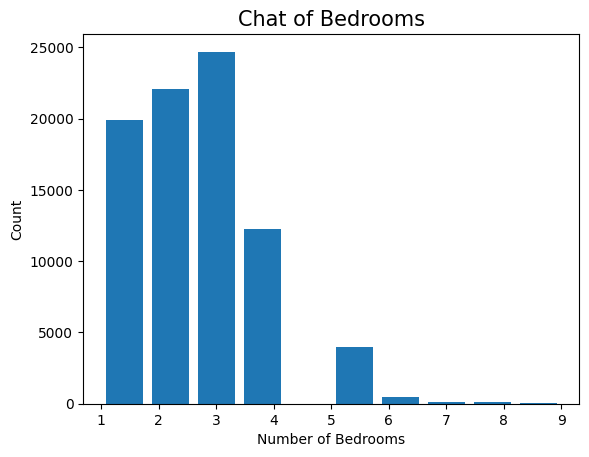

In [179]:
plt.hist(df.Bedrooms,rwidth=0.8)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count")
plt.title('Chat of Bedrooms',size=15)

Text(0.5, 1.0, 'Chat of Bathrooms')

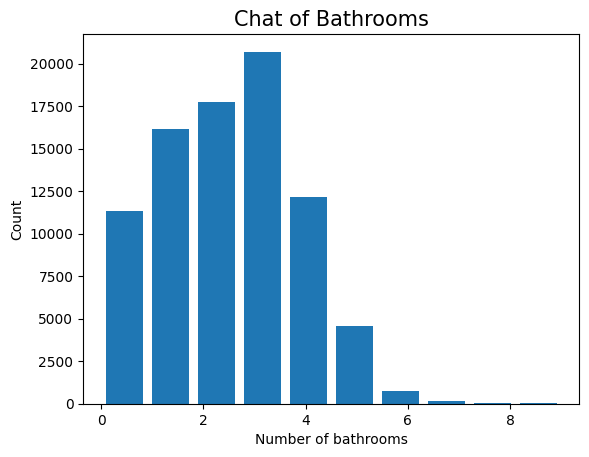

In [180]:
plt.hist(df.Bathrooms,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.title('Chat of Bathrooms',size=15)

Text(0.5, 1.0, 'Chat of Toilets')

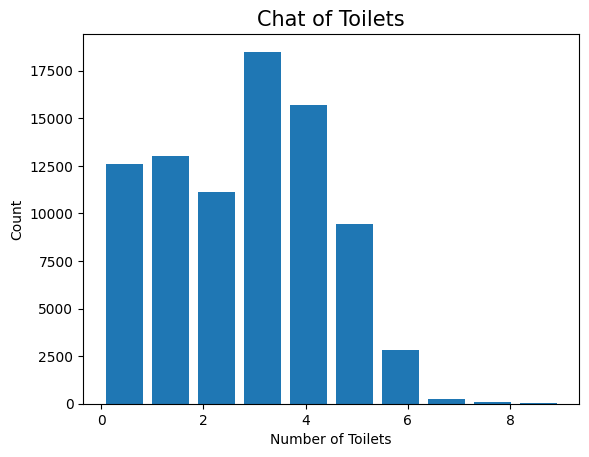

In [181]:
plt.hist(df.Toilets,rwidth=0.8)
plt.xlabel("Number of Toilets")
plt.ylabel("Count")
plt.title('Chat of Toilets',size=15)

<h3>**Machine Learning Proper**</h3>

In [182]:
x=df.drop('Amount',axis=1)
y=df['Amount']

In [183]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [184]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

-0.06141902918156661

In [185]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=7,test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([-4.40428767e-02, -5.81074996e-01, -2.53179120e+00, -5.12182322e-05,
       -1.09573320e+00, -5.26520844e-05, -6.73813347e-01])

In [186]:
cv = ShuffleSplit(n_splits=7, test_size=0.2, random_state=0)
model = LinearRegression()
scores = cross_val_score(model, x, y, cv=cv, scoring='neg_mean_squared_error')

print("Cross-validation scores (negative MSE):", scores)
print("Mean cross-validation score:", np.mean(scores))

# Fit the model on the entire dataset
model.fit(x, y)
model.score(x_test,y_test)

Cross-validation scores (negative MSE): [-2.06352907e+17 -2.47940614e+16 -1.24816542e+16 -1.72869528e+20
 -1.79431553e+16 -1.73007301e+20 -2.09384022e+16]
Mean cross-validation score: -4.9451334162474656e+19


-0.03936670892831917

In [187]:
# To save the train model 
import pickle
with open('Nig_HouseRent.pickle','wb') as f:
    pickle.dump(model,f)